# S&P500 Index Prediction

Using the stock data for the S&P500 I will use a supervised machine learning model to predict future perfromance and price for the index. 

The S&P500 index is a representation of the top 500 companies in the United States and represents the broad market performance and to some analysis, the state of the US Economy. This will allow a better understanding of the direction the markets are in and allow me or someone else to use this data to guide invesment strategies and assess risk.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import mplfinance as mpf


import statsmodels.api as sm

# Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

### Loading in the Data

In [2]:
sp500_df = yf.download('^GSPC', start='2000-01-01', end='2023-04-23')

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-04-17,4137.169922,4151.720215,4123.180176,4151.319824,4151.319824,3611180000
2023-04-18,4164.259766,4169.479980,4140.359863,4154.870117,4154.870117,3536640000
2023-04-19,4139.330078,4162.569824,4134.490234,4154.520020,4154.520020,3572560000


In [4]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5863 entries, 2000-01-03 to 2023-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5863 non-null   float64
 1   High       5863 non-null   float64
 2   Low        5863 non-null   float64
 3   Close      5863 non-null   float64
 4   Adj Close  5863 non-null   float64
 5   Volume     5863 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 320.6 KB


In [5]:
sp500_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5.863000e+03
mean,1901.410050,1912.799536,1889.096078,1901.646263,1901.646263,3.310543e+09
std,989.476344,994.711308,983.838977,989.647408,989.647408,1.523307e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1186.379944,1192.914978,1178.764954,1186.044983,1186.044983,1.999035e+09
50%,1438.939941,1448.810059,1430.420044,1439.180054,1439.180054,3.419850e+09
75%,2429.989990,2439.410034,2414.619995,2429.170044,2429.170044,4.164435e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [6]:
sp500_df = sp500_df.dropna()

In [7]:
# Calc. rolling mean and standard deviation
sp500_df['SMA'] = sp500_df['Adj Close'].rolling(window=30).mean()
sp500_df['STD'] = sp500_df['Adj Close'].rolling(window=30).std()

In [8]:
# Calculate the upper and lower Bollinger Bands
sp500_df['Upper_Band'] = sp500_df['SMA'] + (sp500_df['STD'] * 2)
sp500_df['Lower_Band'] = sp500_df['SMA'] - (sp500_df['STD'] * 2)


In the case of stock price prediction, creating lagged features can help the model learn the relationship between past and future prices, which is essential for making accurate predictions. However, it's important to note that lagging the values alone may not be sufficient for building a robust predictive model, as other factors, such as market conditions, external events, or technical indicators, can also influence stock prices. To improve the model's performance, consider incorporating additional features or using more advanced techniques, such as deep learning or ensemble methods.

Lagging the values in feature engineering for time series data is important for several reasons:

Temporal dependency: In time series data, there is often a dependency between current observations and past observations. By creating lagged features, you can capture this temporal dependency and provide the model with historical information to help it make better predictions.

Autocorrelation: As mentioned earlier, autocorrelation measures the similarity between a time series and a lagged version of itself over different time lags. If there's significant autocorrelation in the data, creating lagged features can help the model exploit this relationship to improve its predictive performance.

Prevent data leakage: In time series forecasting, the model should only have access to information that would have been available at the time of prediction. By lagging the values, you ensure that the model uses only past information to predict future values, preventing data leakage from future observations.

In [9]:
# Creates Shifted Variables to use in the Features of the Linear Regression Model since the data is Time-Series
sp500_df['Lag_1'] = sp500_df['Adj Close'].shift(1)
sp500_df['Lag_2'] = sp500_df['Adj Close'].shift(2)
sp500_df['Lag_3'] = sp500_df['Adj Close'].shift(3)


In [10]:
sp500_df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper_Band,Lower_Band,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,NaN,NaN,NaN,NaN,1455.219971,NaN,NaN
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,NaN,NaN,NaN,NaN,1399.420044,1455.219971,NaN
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,NaN,NaN,NaN,NaN,1402.109985,1399.420044,1455.219971
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,NaN,NaN,NaN,NaN,1403.449951,1402.109985,1399.420044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,4137.169922,4151.720215,4123.180176,4151.319824,4151.319824,3611180000,4015.472339,90.109381,4195.691102,3835.253576,4137.640137,4146.220215,4091.949951
2023-04-18,4164.259766,4169.479980,4140.359863,4154.870117,4154.870117,3536640000,4019.020679,93.484241,4205.989160,3832.052198,4151.319824,4137.640137,4146.220215
2023-04-19,4139.330078,4162.569824,4134.490234,4154.520020,4154.520020,3572560000,4024.625675,96.452834,4217.531343,3831.720008,4154.870117,4151.319824,4137.640137


## Visualizations

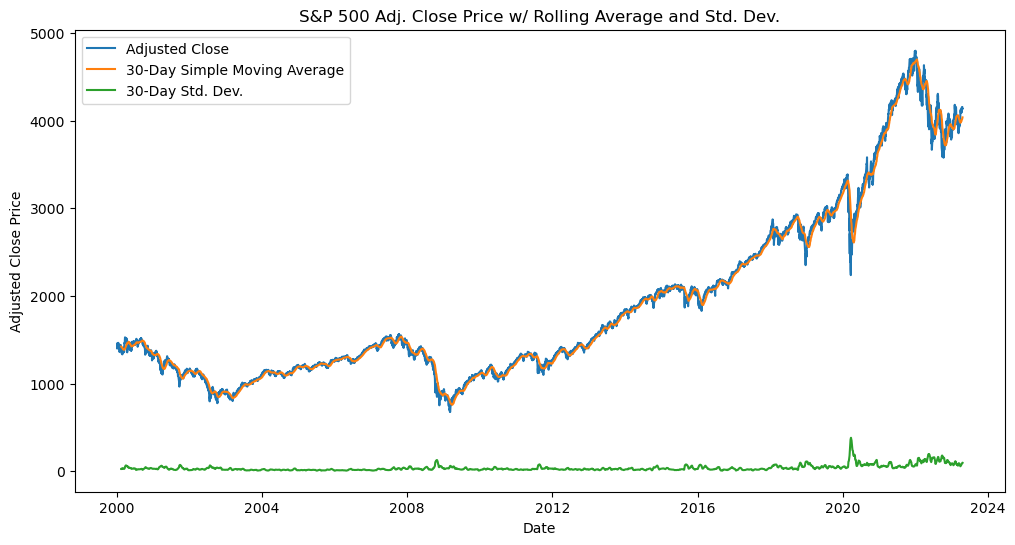

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_df['Adj Close'], label='Adjusted Close')
plt.plot(sp500_df['SMA'], label='30-Day Simple Moving Average')
plt.plot(sp500_df['STD'], label='30-Day Std. Dev.')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("S&P 500 Adj. Close Price w/ Rolling Average and Std. Dev.")
plt.legend()
plt.show()

#### Autocorrelation

Autocorrelation represents the degree of similarity between this dataset and a lagged version of itself since it is a time-series dataset

Examining autocorrelation can provide insights into the underlying data structure and determine whether there is significant relationships between past and future prices that could be used in my predictive model.


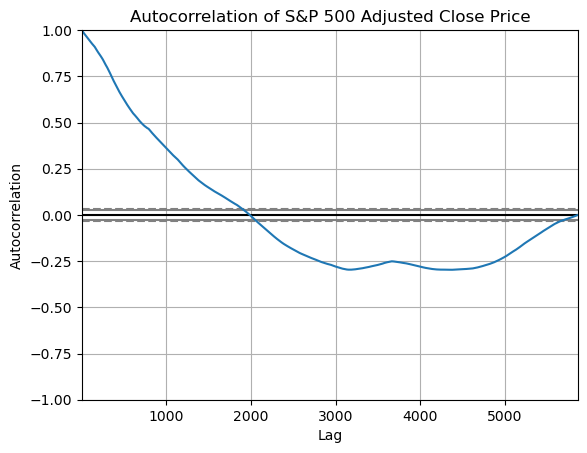

In [12]:
# Autocorrelation plot
pd.plotting.autocorrelation_plot(sp500_df['Adj Close'])
plt.xlabel("Lag")
plt.title("Autocorrelation of S&P 500 Adjusted Close Price")
plt.show()

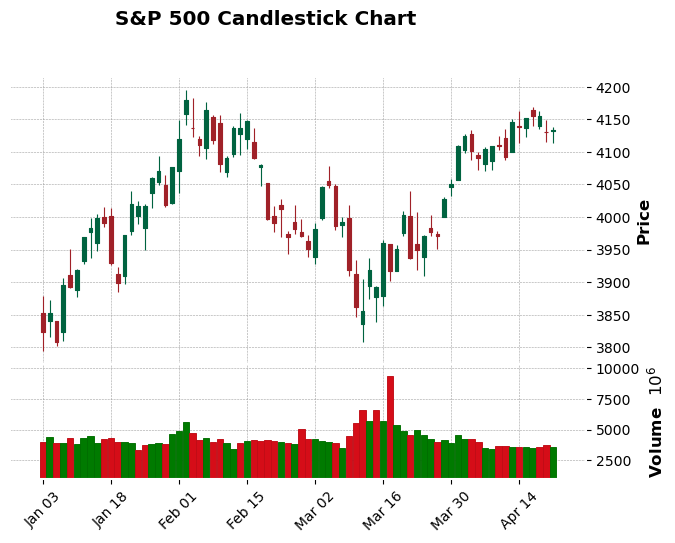

In [13]:
# Create a candlestick chart for this year's performance
start_date = '2023-01-01'
end_date = '2023-04-23'
current_year = sp500_df.loc[start_date:end_date]

# Create the candlestick chart
mpf.plot(current_year, type='candle', style='charles', title='S&P 500 Candlestick Chart', ylabel='Price', volume=True)


## Model Feature Engineering

In [14]:
model_data = sp500_df.copy()
model_data

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper_Band,Lower_Band,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,NaN,NaN,NaN,NaN,1455.219971,NaN,NaN
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,NaN,NaN,NaN,NaN,1399.420044,1455.219971,NaN
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,NaN,NaN,NaN,NaN,1402.109985,1399.420044,1455.219971
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,NaN,NaN,NaN,NaN,1403.449951,1402.109985,1399.420044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,4137.169922,4151.720215,4123.180176,4151.319824,4151.319824,3611180000,4015.472339,90.109381,4195.691102,3835.253576,4137.640137,4146.220215,4091.949951
2023-04-18,4164.259766,4169.479980,4140.359863,4154.870117,4154.870117,3536640000,4019.020679,93.484241,4205.989160,3832.052198,4151.319824,4137.640137,4146.220215
2023-04-19,4139.330078,4162.569824,4134.490234,4154.520020,4154.520020,3572560000,4024.625675,96.452834,4217.531343,3831.720008,4154.870117,4151.319824,4137.640137


In [15]:
# Drop Na Values from model data especially for Lag 1, Lag 2, and Lag 3
model_data = model_data.dropna()
model_data

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper_Band,Lower_Band,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,
2000-02-14,1387.119995,1394.930054,1380.530029,1389.939941,1389.939941,927300000,1421.700330,25.804537,1473.309403,1370.091256,1387.119995,1416.829956,1411.709961
2000-02-15,1389.939941,1407.719971,1376.250000,1402.050049,1402.050049,1092100000,1419.927999,25.242740,1470.413479,1369.442518,1389.939941,1387.119995,1416.829956
2000-02-16,1402.050049,1404.550049,1385.579956,1387.670044,1387.670044,1018800000,1419.536332,25.659628,1470.855589,1368.217075,1402.050049,1389.939941,1387.119995
2000-02-17,1387.670044,1399.880005,1380.069946,1388.260010,1388.260010,1034800000,1419.074666,26.104707,1471.284080,1366.865252,1387.670044,1402.050049,1389.939941
2000-02-18,1388.260010,1388.589966,1345.319946,1346.089966,1346.089966,1042300000,1417.162667,29.205089,1475.572844,1358.752490,1388.260010,1387.670044,1402.050049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,4137.169922,4151.720215,4123.180176,4151.319824,4151.319824,3611180000,4015.472339,90.109381,4195.691102,3835.253576,4137.640137,4146.220215,4091.949951
2023-04-18,4164.259766,4169.479980,4140.359863,4154.870117,4154.870117,3536640000,4019.020679,93.484241,4205.989160,3832.052198,4151.319824,4137.640137,4146.220215
2023-04-19,4139.330078,4162.569824,4134.490234,4154.520020,4154.520020,3572560000,4024.625675,96.452834,4217.531343,3831.720008,4154.870117,4151.319824,4137.640137


## NOTE: 
I have to set the shuffle parameter to 'False' because this was leading to a very high r2 of almost 1. While in other datasets this should be fine, since this is time-series data it sufferes from look-ahead bias when we randomize the data.

In [16]:
# Use Lagged data for predictors
x = model_data[['Lag_1', 'Lag_2', 'Lag_3']]

# Target is Adj Close price 
y = model_data['Adj Close']

# Split Train and Test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, shuffle=False)

In [17]:
# Scale Data for better results in the training and test data by reducing the potential of overfitting
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


## Model and Training

### Linear Regression Model

In [18]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_predict = linear_model.predict(x_test)
linear_predictions = linear_model.predict(x_test)

In [20]:
y_test

Date
2018-08-31    2901.520020
2018-09-04    2896.719971
2018-09-05    2888.600098
2018-09-06    2878.050049
2018-09-07    2871.679932
                 ...     
2023-04-17    4151.319824
2023-04-18    4154.870117
2023-04-19    4154.520020
2023-04-20    4129.790039
2023-04-21    4133.520020
Name: Adj Close, Length: 1167, dtype: float64

In [21]:
linear_predictions

array([2902.18878555, 2903.42503992, 2898.18653385, ..., 4155.74345326,
       4156.23618463, 4133.30585418])

In [22]:
len(linear_predictions)

1167

In [23]:
mean_squared_error_train= mean_squared_error(y_test, y_predict)
mean_absolute_error_train= mean_absolute_error(y_test, y_predict)

In [24]:
print(mean_squared_error_train)
print(mean_absolute_error_train)

2186.005439813356
32.26372051685984


In [25]:
linear_model.score(x_train,y_train)

0.9990175904959592

### Random Forest

In [28]:
# Random Forest (RF)
rf = RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_score = rf.score(x_train, y_train)

In [29]:
print("Random Forest MSE:", rf_mse) 
print("Random Forest R2:", rf_score)

Random Forest MSE: 874306.2948718013
Random Forest R2: 0.9998379987123628


### Resources
- https://pypi.org/project/yfinance/

S&P500 History
- https://www.investopedia.com/ask/answers/041015/what-history-sp-500.asp

Bollinger Bands
- https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3

Simple Moving Averages
- https://sohan-dillikar.medium.com/buy-and-sell-signals-with-the-simple-moving-average-crossover-8a51c9fa3e0a